In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [192]:
df = pd.read_csv('carprice.csv')

# Data Preprocessing

In [119]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [120]:
df.shape

(4340, 8)

In [121]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,4340.0,2013.090783,4.215344,1992.0,2011.00,2014.0,2016.0,2020.0
selling_price,4340.0,504127.311751,578548.736139,20000.0,208749.75,350000.0,600000.0,8900000.0
km_driven,4340.0,66215.777419,46644.102194,1.0,35000.00,60000.0,90000.0,806599.0


In [122]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [123]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [193]:
df.duplicated().sum()

np.int64(763)

In [194]:
df[df.duplicated(keep=False)].sort_values(by=df.columns.tolist()).head(20)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
3912,Ambassador CLASSIC 1500 DSL AC,2005,120000,50000,Diesel,Individual,Manual,Second Owner
4016,Ambassador CLASSIC 1500 DSL AC,2005,120000,50000,Diesel,Individual,Manual,Second Owner
99,Audi A4 2.0 TDI 177 Bhp Premium Plus,2013,1150000,53000,Diesel,Dealer,Automatic,First Owner
2578,Audi A4 2.0 TDI 177 Bhp Premium Plus,2013,1150000,53000,Diesel,Dealer,Automatic,First Owner
554,Audi A4 3.0 TDI Quattro,2013,1580000,86000,Diesel,Dealer,Automatic,First Owner
573,Audi A4 3.0 TDI Quattro,2013,1580000,86000,Diesel,Dealer,Automatic,First Owner
592,Audi A4 3.0 TDI Quattro,2013,1580000,86000,Diesel,Dealer,Automatic,First Owner
611,Audi A4 3.0 TDI Quattro,2013,1580000,86000,Diesel,Dealer,Automatic,First Owner
899,Audi A4 3.0 TDI Quattro,2013,1580000,86000,Diesel,Dealer,Automatic,First Owner
918,Audi A4 3.0 TDI Quattro,2013,1580000,86000,Diesel,Dealer,Automatic,First Owner


In [195]:
# Delete duplicate rows
df = df.drop_duplicates().reset_index(drop=True)

In [196]:
# Convert year data type to int
df['year']=df['year'].astype(int)

In [197]:
# Convert name to brand
df['name'].unique() 
df['brand'] = df['name'].str.split().str[0]
print("Brand extracted from name:")
print(df['brand'].unique())

df['brand'] = df['brand'].replace('Land', 'Land Rover')

Brand extracted from name:
['Maruti' 'Hyundai' 'Datsun' 'Honda' 'Tata' 'Chevrolet' 'Toyota' 'Jaguar'
 'Mercedes-Benz' 'Audi' 'Skoda' 'Jeep' 'BMW' 'Mahindra' 'Ford' 'Nissan'
 'Renault' 'Fiat' 'Volkswagen' 'Volvo' 'Mitsubishi' 'Land' 'Daewoo' 'MG'
 'Force' 'Isuzu' 'OpelCorsa' 'Ambassador' 'Kia']


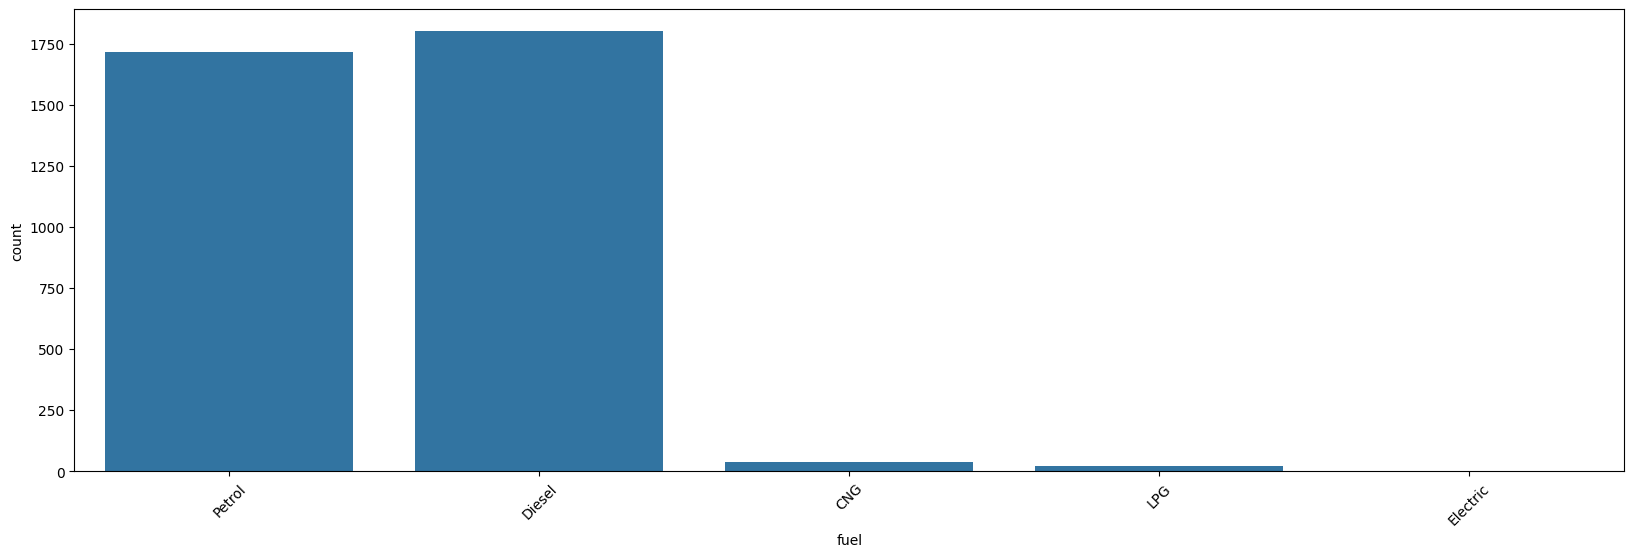

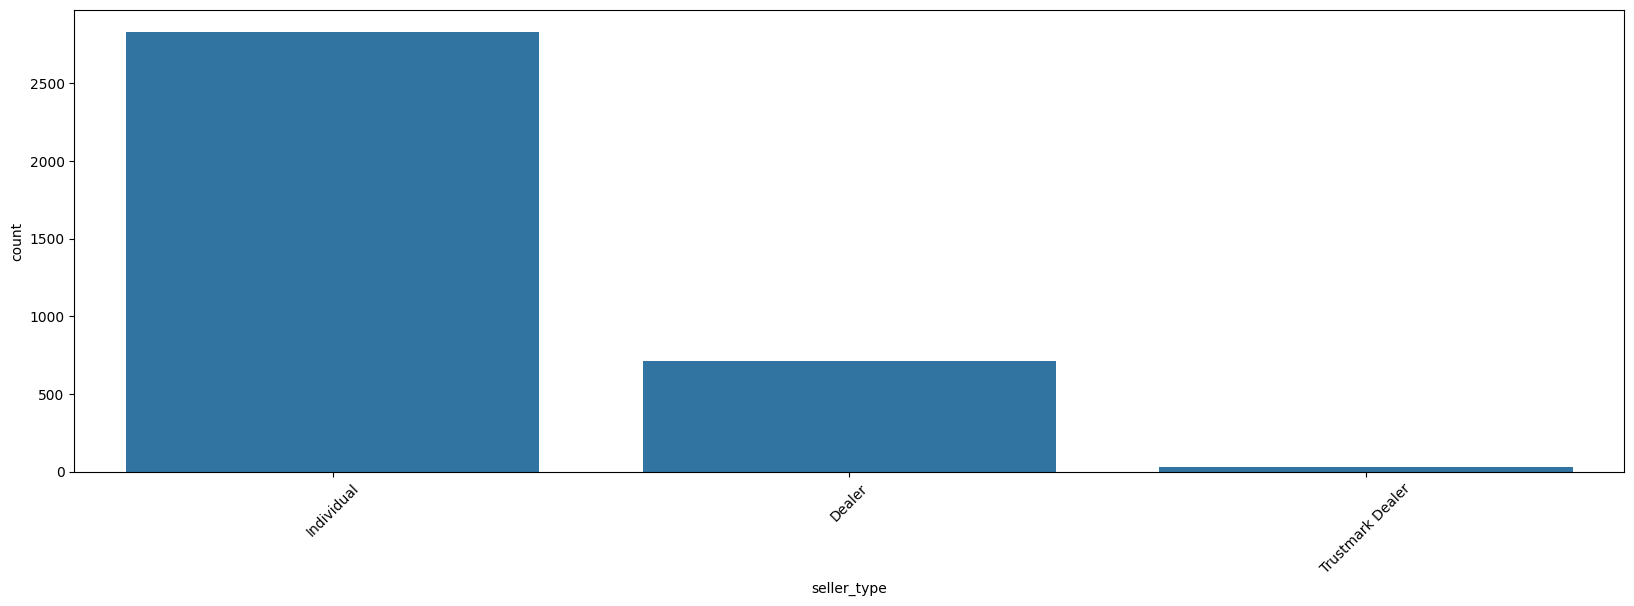

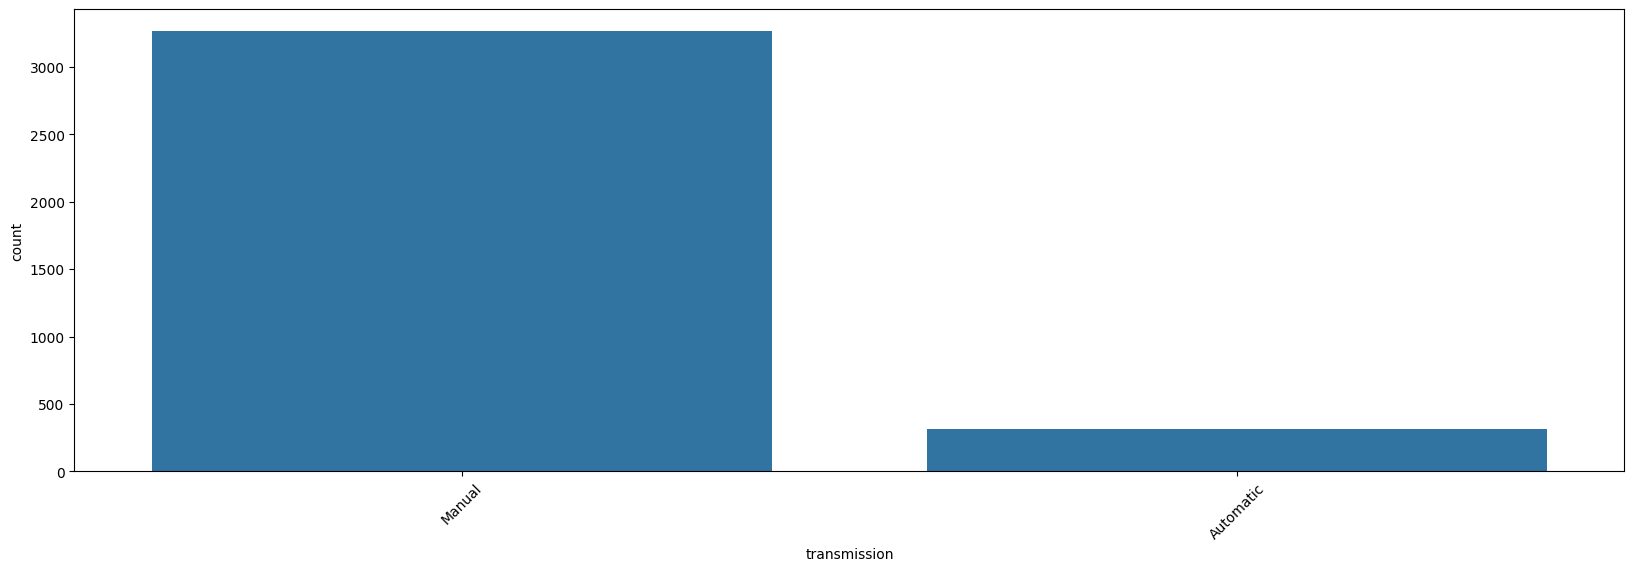

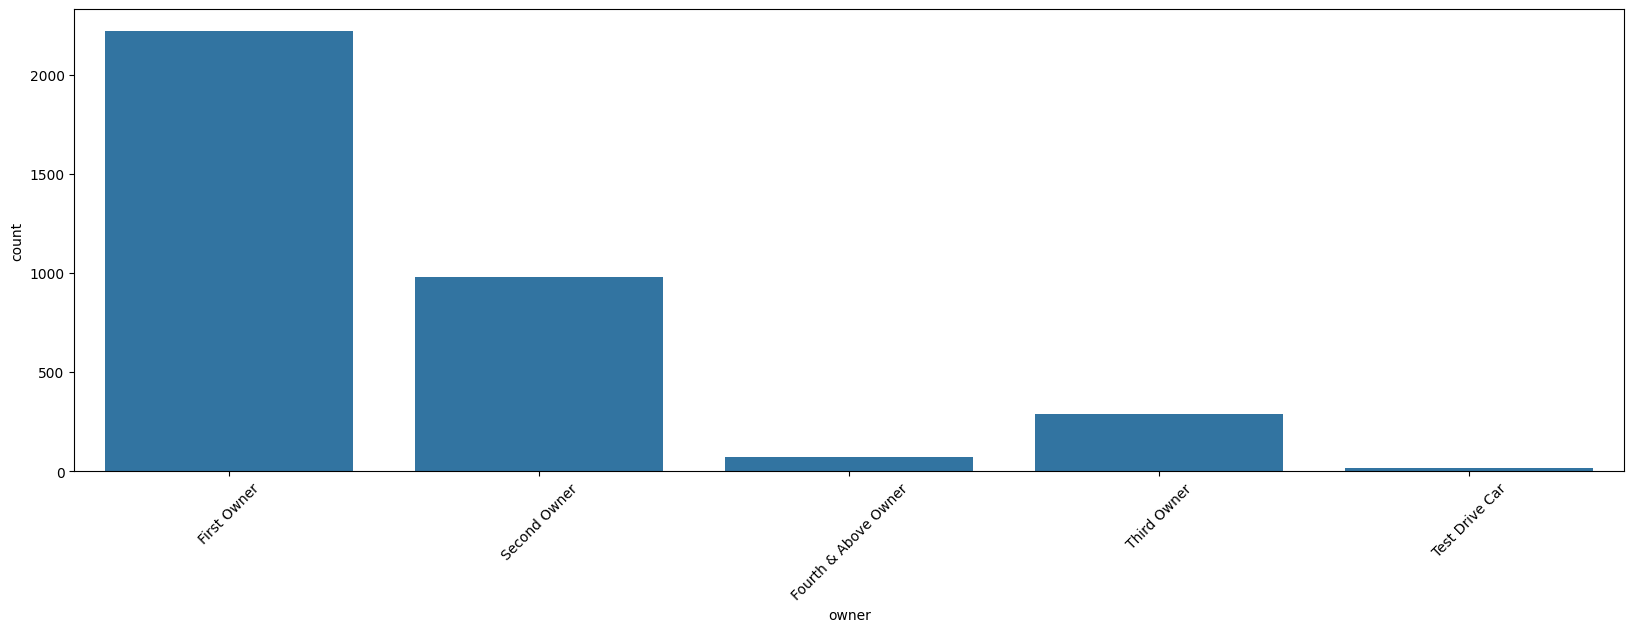

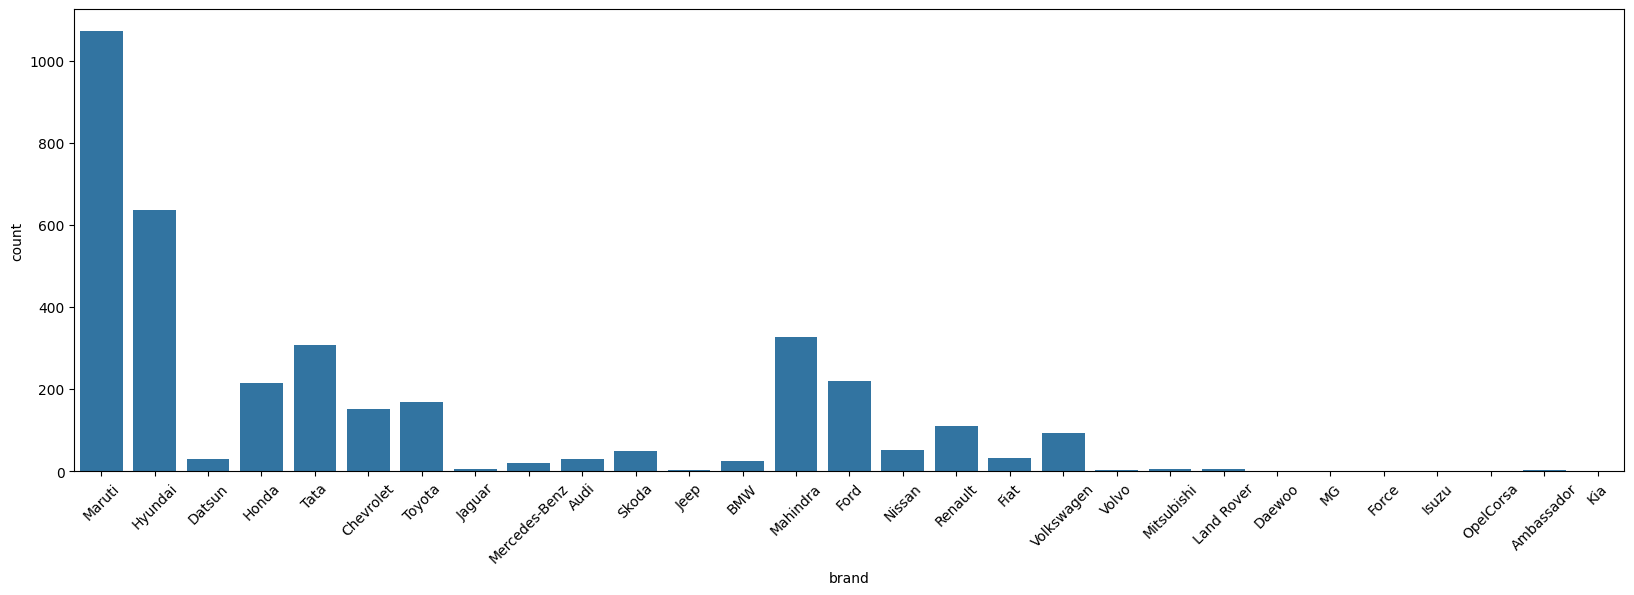

In [130]:
#Check value distribution for categorical columns
for col in df.columns:
    if col not in ['year','selling_price','name','km_driven']:
        plt.figure(figsize=(20,6))
        sns.countplot(x=col,data=df)
        plt.xticks(rotation=45)
        plt.show() 

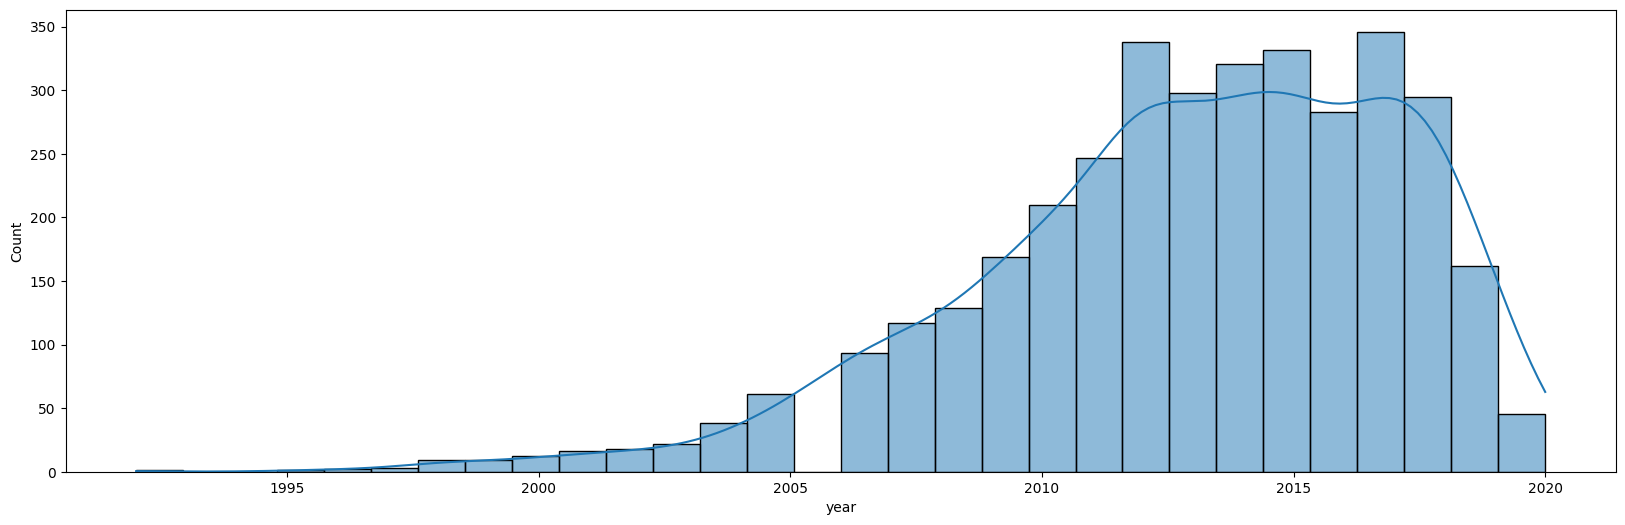

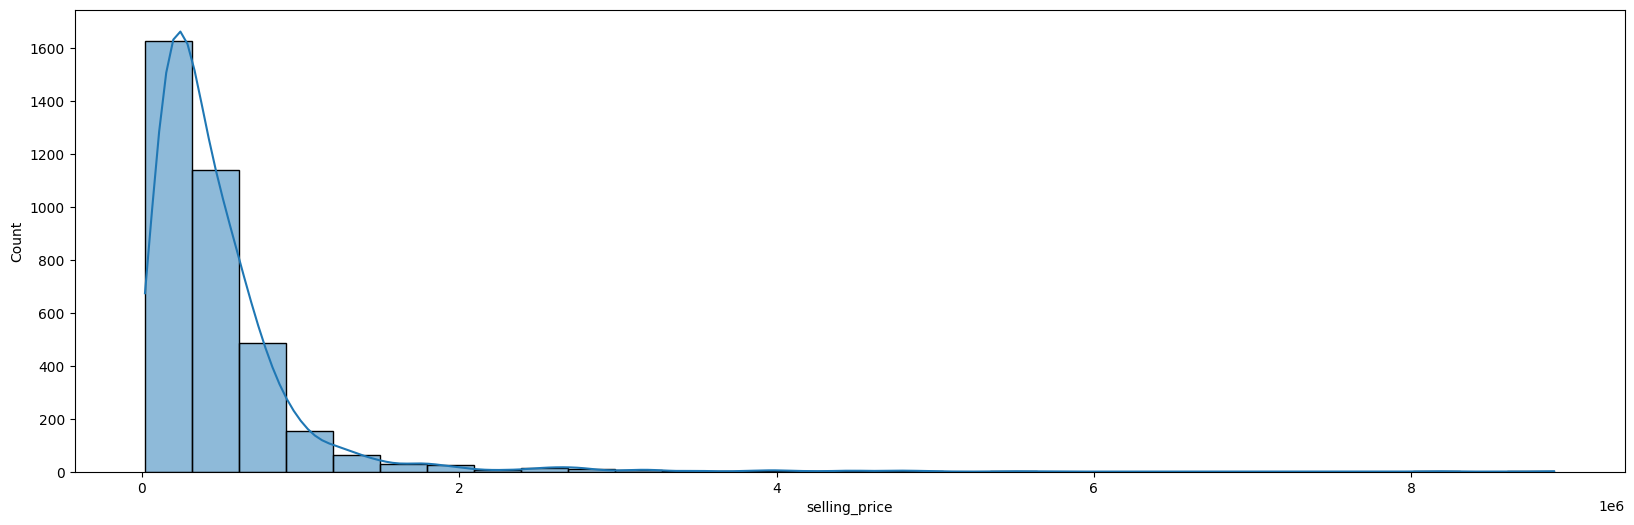

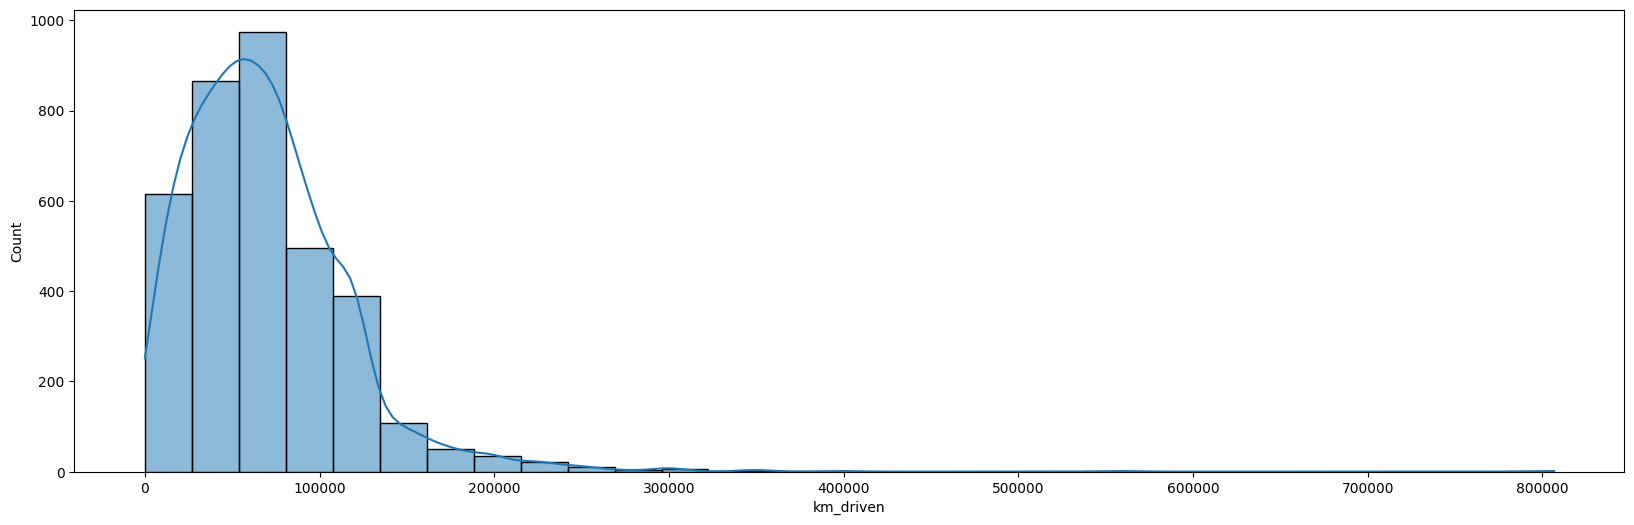

In [131]:
#Check value distribution for numerical columns
for col in df.columns:
    if col in ['year','selling_price','km_driven']:
        plt.figure(figsize=(20,6))
        df[col].sort_values(ascending=False)
        sns.histplot(df[col],bins=30, kde=True)
        plt.show() 

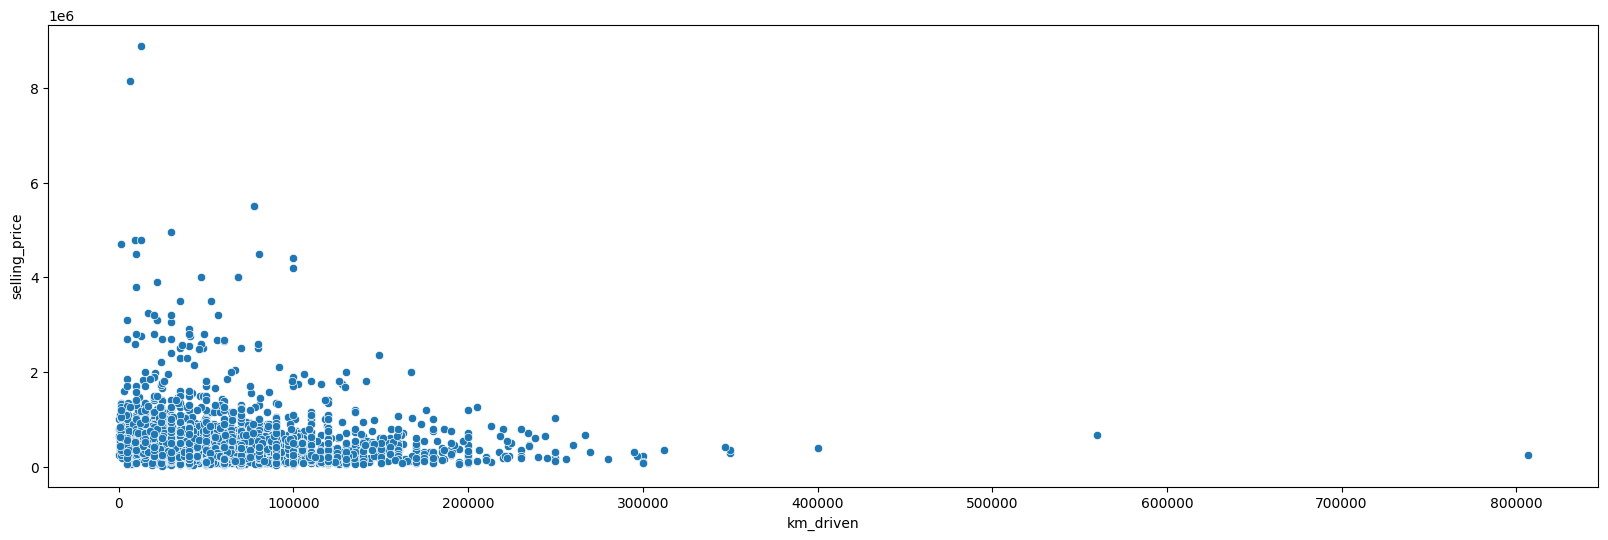

In [132]:
# Correlation analysis for km driven
plt.figure(figsize=(20,6))
sns.scatterplot(x=df['km_driven'], y=df['selling_price'])
plt.show()

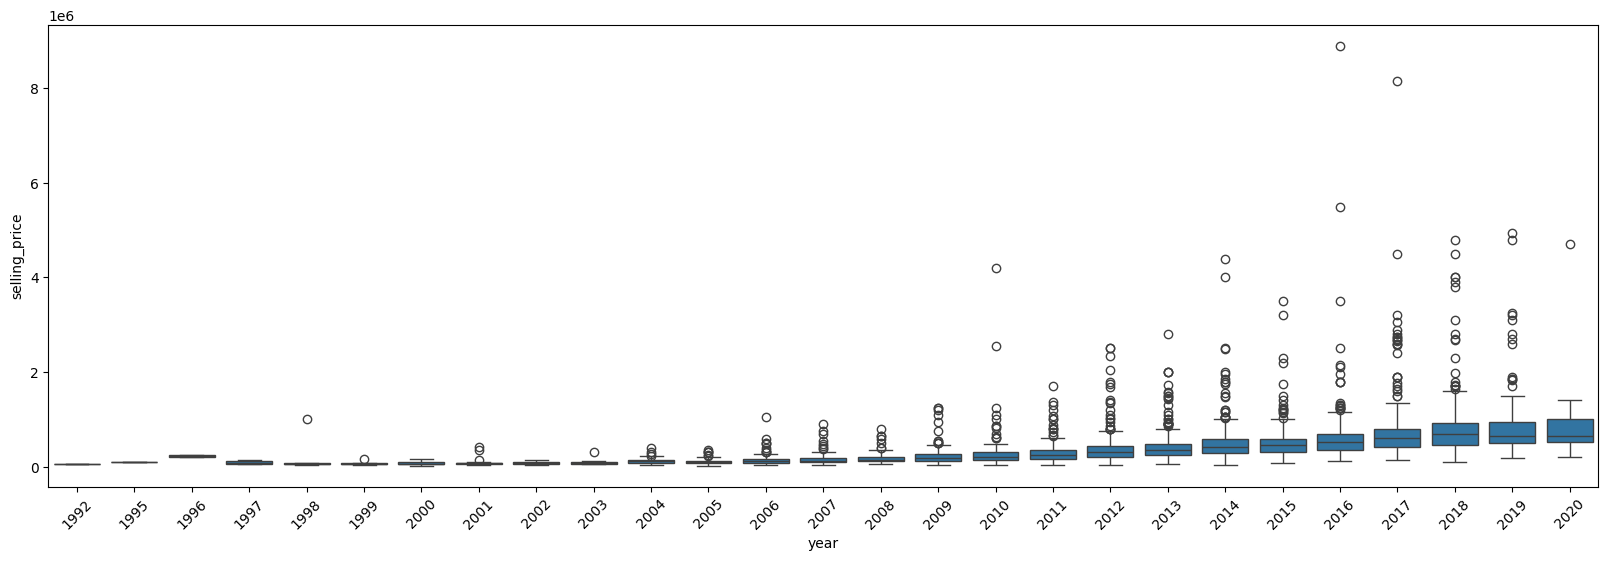

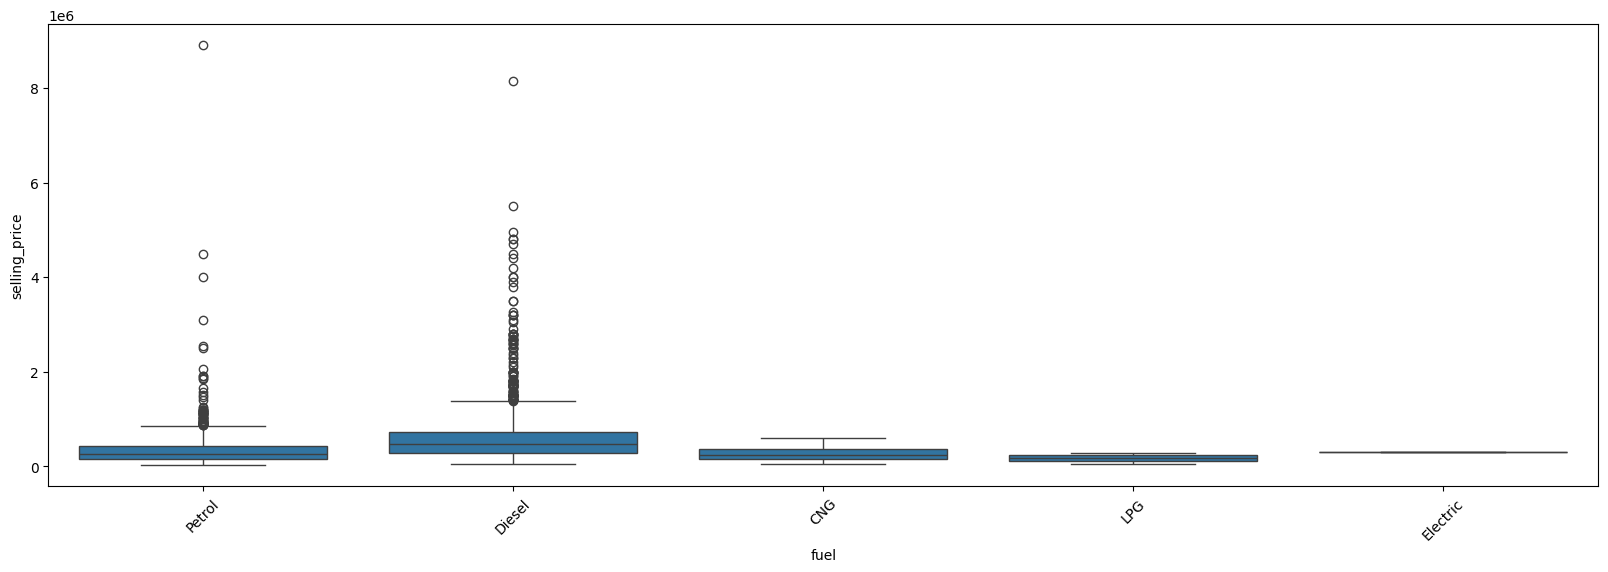

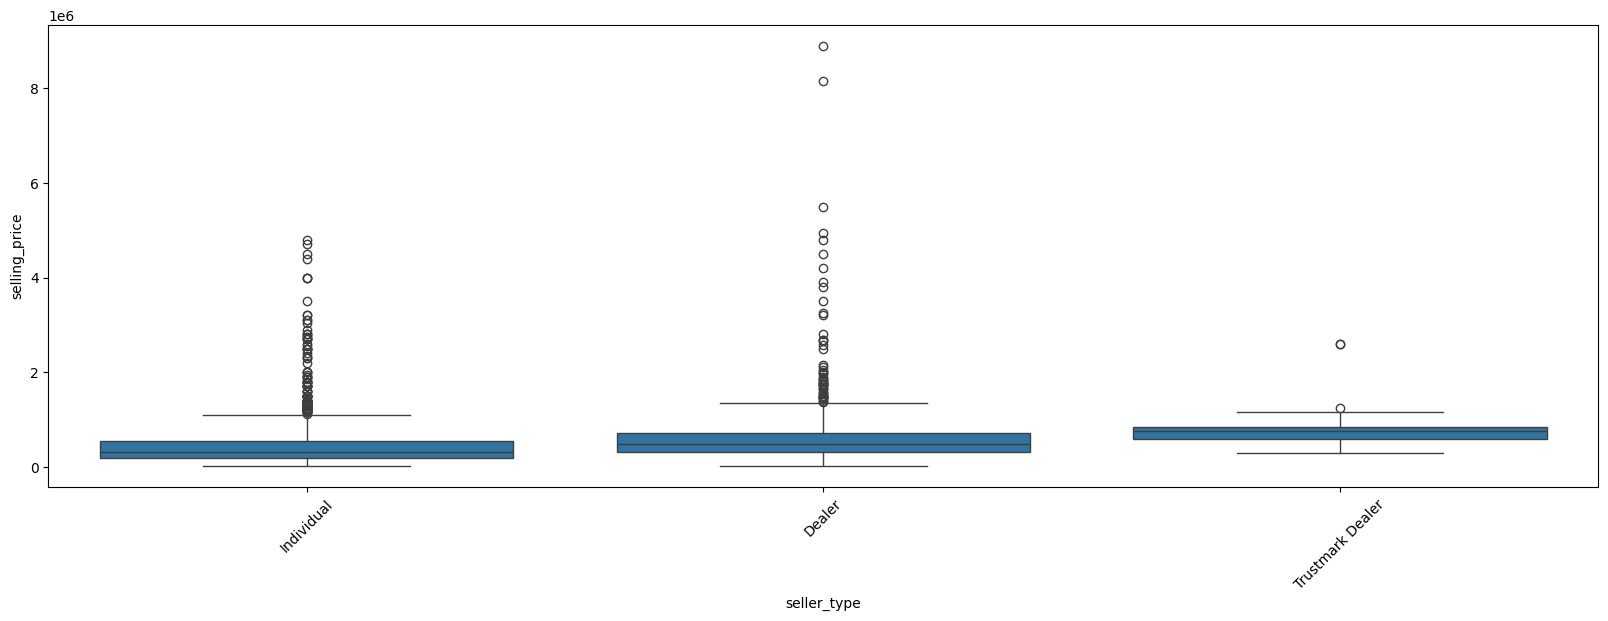

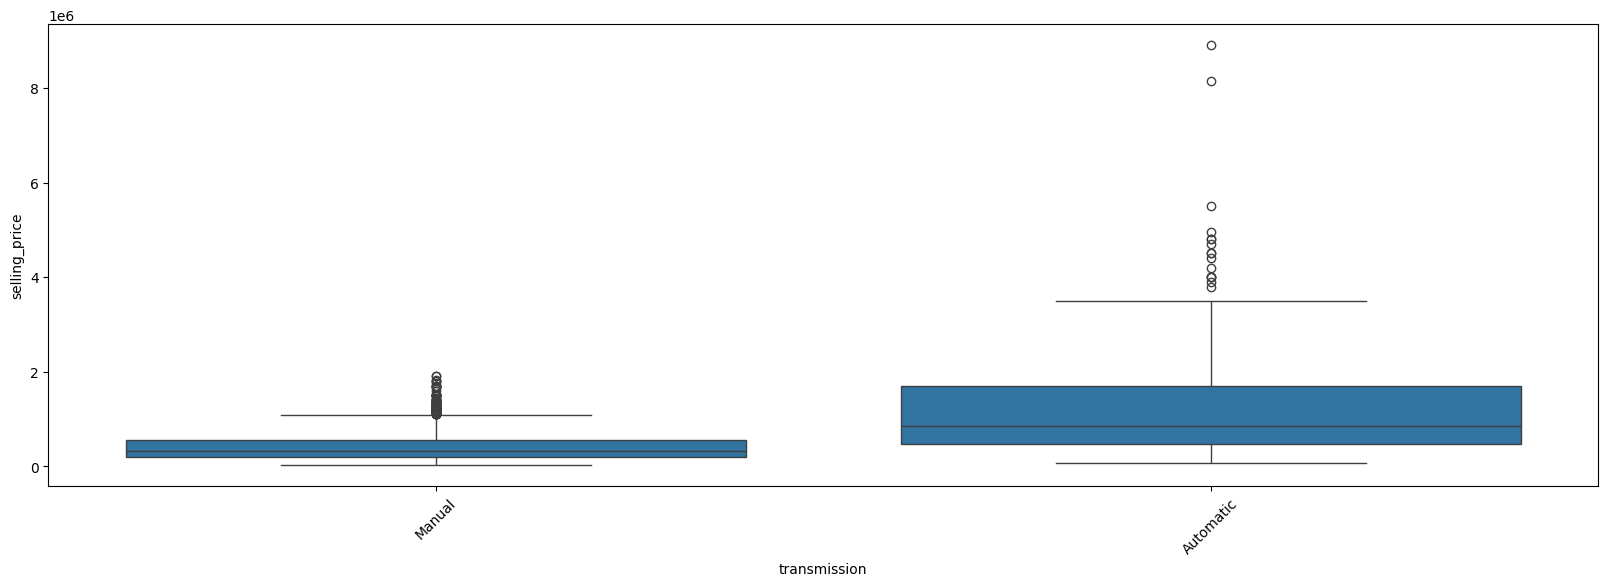

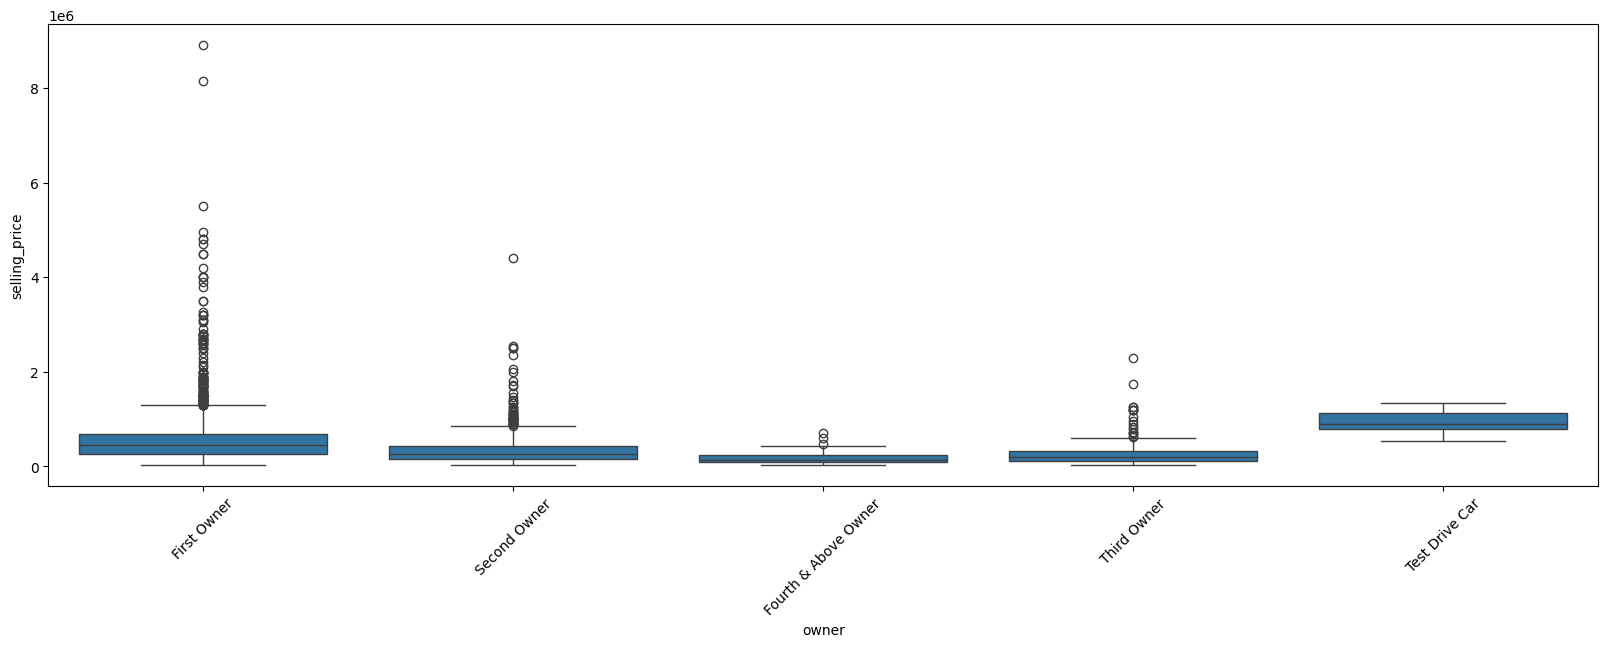

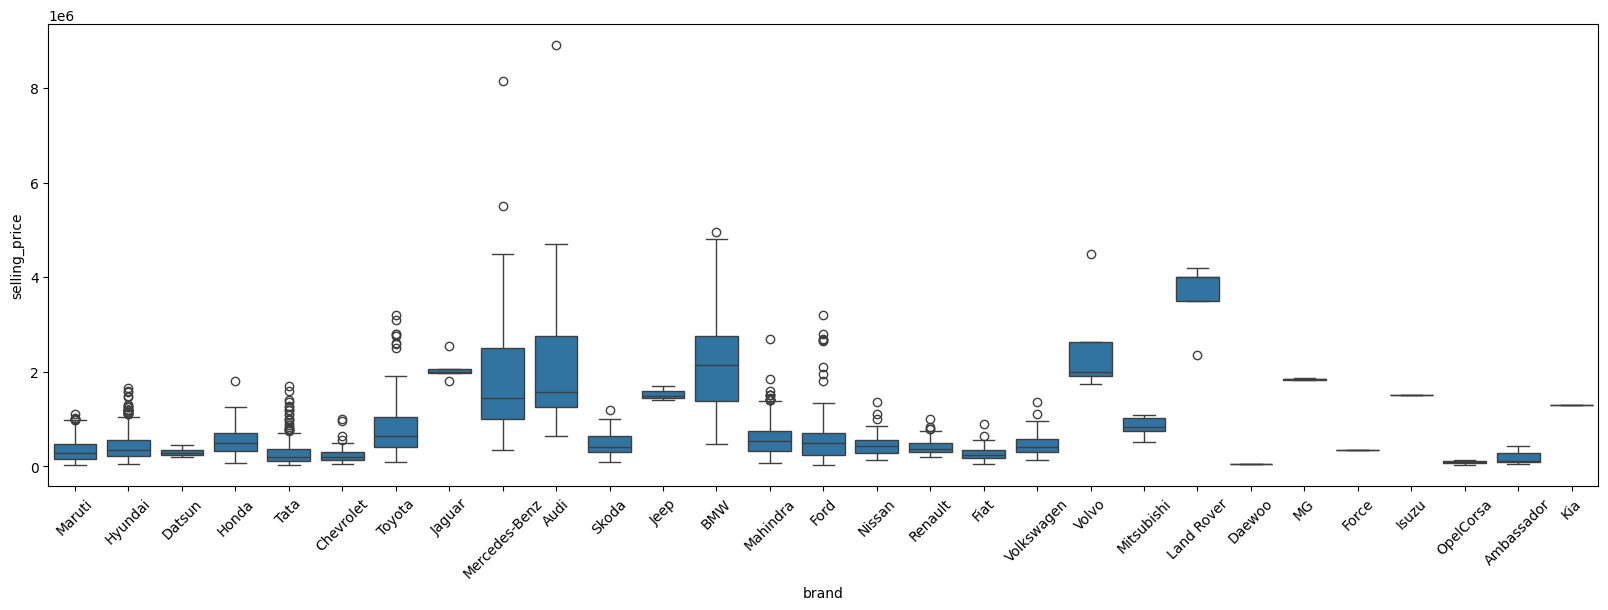

In [133]:
# Correlation analysis
for col in df.columns:
    if col not in ['selling_price','name','km_driven']:
        plt.figure(figsize=(20,6))
        sns.boxplot(x=df[col], y=df['selling_price'])
        plt.xticks(rotation=45)
        plt.show()

# Handling Outliers

In [166]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda


Shape before outlier removal: (3577, 9)
Shape after outlier removal: (3471, 9)


/var/folders/s4/q43588m97sq_sf5s7q6188cc0000gn/T/ipykernel_775/1230999944.py:27: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('brand', group_keys=False).apply(filter_brand_outliers)


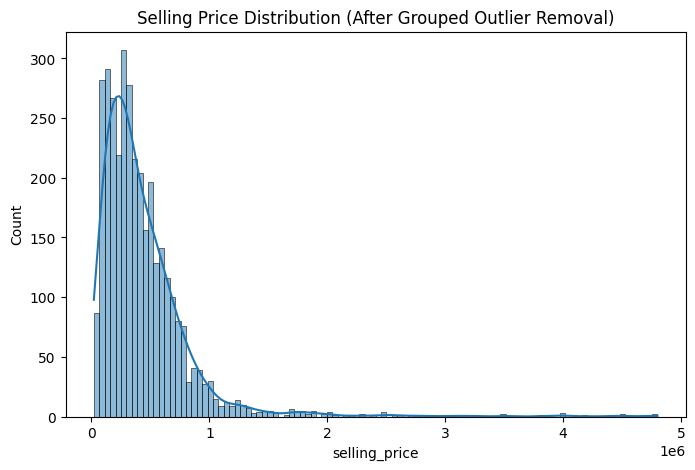

In [218]:
# # Outlier Handling: Grouped by Brand (Improved)
# Global IQR removal deletes luxury brands (like Land Rover) because they are expensive compared to average.
# We should remove outliers WITHIN each brand to preserve high-end brands.

print(f"Shape before outlier removal: {df.shape}")
brand_counts_before = df['brand'].value_counts()

# Function to filter outliers per group
def filter_brand_outliers(group):
    # If a brand has very few samples (e.g. < 5), we keep them all to avoid losing rare luxury cars
    if len(group) < 5: 
        return group
    
    Q1 = group['selling_price'].quantile(0.25)
    Q3 = group['selling_price'].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds specific to this brand
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # Return only valid rows
    return group[(group['selling_price'] >= lower) & (group['selling_price'] <= upper)]

# Apply grouping and filtering
# group_keys=False prevents pandas from adding an extra index level
df = df.groupby('brand', group_keys=False).apply(filter_brand_outliers)

print(f"Shape after outlier removal: {df.shape}")

# Visualization
plt.figure(figsize=(8, 5))
sns.histplot(df['selling_price'], kde=True)
plt.title('Selling Price Distribution (After Grouped Outlier Removal)')
plt.show()

In [168]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand
2435,Ambassador Classic 2000 Dsz,2002,50000,120000,Diesel,Individual,Manual,Fourth & Above Owner,Ambassador
2893,Ambassador Grand 1800 ISZ MPFI PW CL,2012,430000,50000,Petrol,Individual,Manual,Second Owner,Ambassador
3287,Ambassador CLASSIC 1500 DSL AC,2005,120000,50000,Diesel,Individual,Manual,Second Owner,Ambassador
19,Audi Q5 2.0 TDI,2011,1190000,175900,Diesel,Dealer,Automatic,First Owner,Audi
22,Audi A6 2.0 TDI Design Edition,2013,1735000,50000,Diesel,Dealer,Automatic,First Owner,Audi


# Feature Engineering

In [219]:
col_to_encode = ['brand','fuel','seller_type','transmission','owner']
encoded_df = pd.get_dummies(df,columns = col_to_encode,drop_first=True)

In [220]:
encoded_df.head()

,name,year,selling_price,km_driven,brand_Audi,brand_BMW,brand_Chevrolet,brand_Daewoo,brand_Datsun,brand_Fiat,...,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
2435,Ambassador Classic 2000 Dsz,2002,50000,120000,False,False,False,False,False,False,...,False,False,False,True,False,True,True,False,False,False
2893,Ambassador Grand 1800 ISZ MPFI PW CL,2012,430000,50000,False,False,False,False,False,False,...,False,False,True,True,False,True,False,True,False,False
3287,Ambassador CLASSIC 1500 DSL AC,2005,120000,50000,False,False,False,False,False,False,...,False,False,False,True,False,True,False,True,False,False
19,Audi Q5 2.0 TDI,2011,1190000,175900,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
22,Audi A6 2.0 TDI Design Edition,2013,1735000,50000,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [221]:
# Convert target variable to log
encoded_df['y_log']= np.log(df['selling_price'])

In [222]:
encoded_df['year'] = encoded_df['year'].astype(int)

In [223]:
X = encoded_df.drop(columns=['selling_price', 'y_log','name'],axis=1)

In [224]:
X.head()

,year,km_driven,brand_Audi,brand_BMW,brand_Chevrolet,brand_Daewoo,brand_Datsun,brand_Fiat,brand_Force,brand_Ford,...,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
2435,2002,120000,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,True,False,False,False
2893,2012,50000,False,False,False,False,False,False,False,False,...,False,False,True,True,False,True,False,True,False,False
3287,2005,50000,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,True,False,False
19,2011,175900,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
22,2013,50000,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [377]:
y=encoded_df['y_log']
#y=encoded_df['selling_price']

In [378]:
y.head()

2435    10.819778
2893    12.971540
3287    11.695247
19      13.989464
22      14.366518
Name: y_log, dtype: float64

In [379]:
df_excluded = encoded_df.drop(columns=['y_log','name'])
df_excluded.corr()['selling_price'].sort_values(ascending=False)

selling_price                   1.000000
year                            0.444848
brand_Audi                      0.340593
brand_BMW                       0.337995
fuel_Diesel                     0.284746
brand_Land Rover                0.283514
brand_Mercedes-Benz             0.245975
brand_Volvo                     0.172240
brand_Toyota                    0.161433
brand_Jaguar                    0.110338
brand_Mahindra                  0.082539
brand_MG                        0.080739
owner_Test Drive Car            0.080132
brand_Jeep                      0.076900
brand_Honda                     0.059355
seller_type_Trustmark Dealer    0.057082
brand_Isuzu                     0.043167
brand_Mitsubishi                0.036855
brand_Kia                       0.035041
brand_Ford                      0.026317
brand_Skoda                     0.006485
brand_Volkswagen                0.002872
brand_Force                    -0.003721
fuel_Electric                  -0.005183
brand_Nissan    

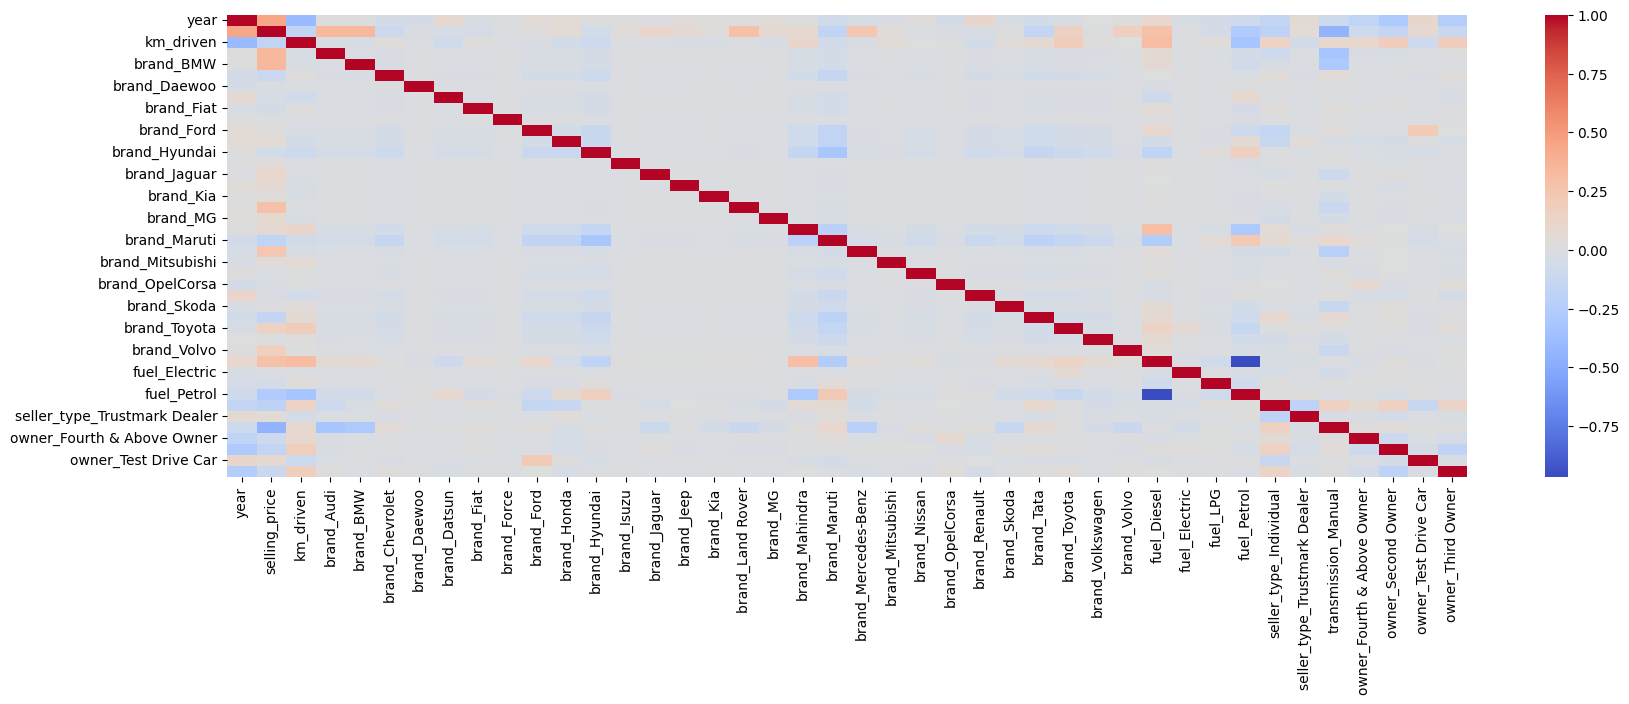

In [228]:
# Heatmap for correlations
plt.figure(figsize=(20,6))
sns.heatmap(df_excluded.corr(),cmap='coolwarm')
plt.show()

# Train Test Split

In [380]:
from sklearn.model_selection import train_test_split

In [381]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Modeling - Gradient Boosting

In [382]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

In [383]:
gbr = GradientBoostingRegressor(random_state=42)

In [384]:
from sklearn.model_selection import GridSearchCV

In [463]:
# Experiment 1
# param_grid_gbr = {
#     'n_estimators': [100, 200, 500],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [2, 3, 4],
#     'min_samples_split': [2, 5, 10, 20],
#     'max_features': ['sqrt',None]
# }

In [492]:
# Experiment 2
# param_grid_gbr = {
#     'n_estimators': [200, 500,800, 1000],
#     'learning_rate': [0.1, 0.05, 0.03, 0.01],
#     'max_depth': [4,5,6,7],
#     'min_samples_split': [2,3,4,5],
#     'max_features': ['sqrt',None]
# }

In [505]:
# Experiment 3
param_grid_gbr = {
    'n_estimators': [500, 800, 1000],
    'learning_rate': [0.1, 0.05, 0.03, 0.01],
    'max_depth': [2,4],
    'min_samples_split': [5, 6,7],
    'max_features': ['sqrt',None]
}

In [506]:
grid_search_gbr = GridSearchCV( 
    estimator=gbr,
    param_grid=param_grid_gbr,
    cv=5,               
    scoring='neg_mean_squared_error',  
    n_jobs=-1           
)

grid_search_gbr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.05, 0.03, 0.01],
                         'max_depth': [2, 4], 'max_features': ['sqrt', None],
                         'min_samples_split': [5, 6, 7],
                         'n_estimators': [500, 800, 1000]},
             scoring='neg_mean_squared_error')

In [507]:
print("Best Parameters:", grid_search_gbr.best_params_)

best_model_gbr = grid_search_gbr.best_estimator_
y_pred_gbr = best_model_gbr.predict(X_test)
y_train_pred_gbr = best_model_gbr.predict(X_train)

y_test_original=np.exp(y_test)
y_pred_original_gbr=np.exp(y_pred_gbr)

Best Parameters: {'learning_rate': 0.05, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_split': 7, 'n_estimators': 800}


# Evaluation

In [508]:
# Gradient Boosting performance
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
r_gbr = round(r2_score(y_test, y_pred_gbr),4)

rmse_gbr_train = np.sqrt(mean_squared_error(y_train, y_train_pred_gbr))
r_gbr_train = round(r2_score(y_train, y_train_pred_gbr),4)

print("Train RMSE:", rmse_gbr_train)
print("Train R Squared:", r_gbr_train)

print("Test RMSE:", rmse_gbr)
print("Test R Squared:", r_gbr)

Train RMSE: 0.3075850663482437
Train R Squared: 0.8453
Test RMSE: 0.3535077148860287
Test R Squared: 0.7997


In [499]:
# Gradient Boosting performance for original scale
rmse_original_gbr = np.sqrt(mean_squared_error(y_test_original, y_pred_original_gbr))
r_original_gbr = r2_score(y_test_original, y_pred_original_gbr)

print("Test RMSE (Original):", rmse_original_gbr)
print("R Squared (Original):", r_original_gbr)

Test RMSE (Original): 202159.12728031818
R Squared (Original): 0.7674365633850272


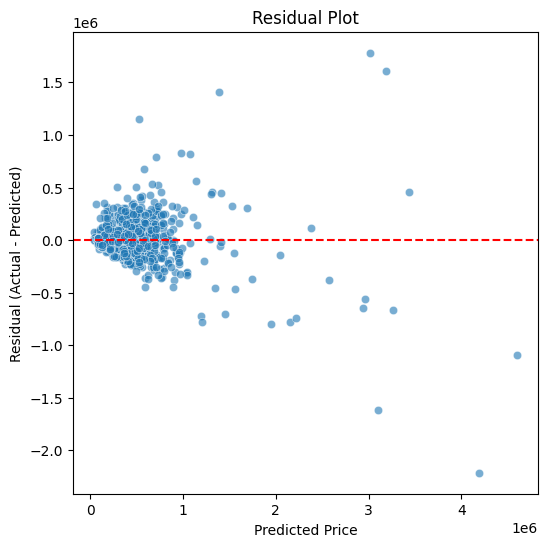

In [518]:
# Residual plot for Gradient Boosting
residuals_gbr = y_test_original - y_pred_original_gbr

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_pred_original_gbr, y=residuals_gbr, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()

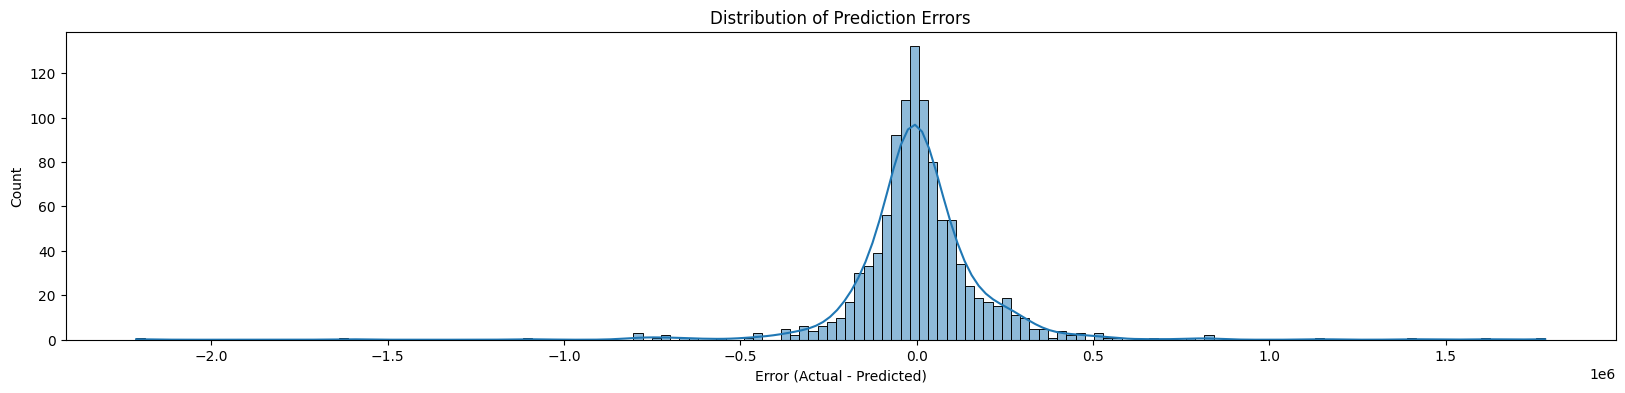

In [519]:
# Error Distribution Plot for Gradient Boosting
plt.figure(figsize=(20,4))
sns.histplot(residuals_gbr, kde=True)
plt.title("Distribution of Prediction Errors")
plt.xlabel("Error (Actual - Predicted)")
plt.show()

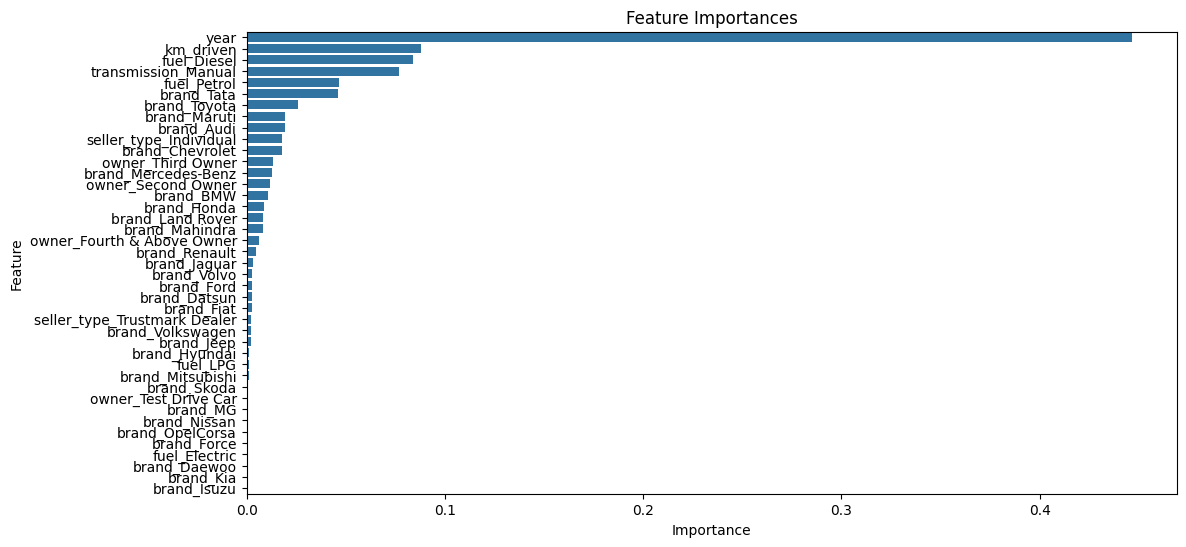

In [513]:
# Feature importance for Gradient Boosting
importances = best_model_gbr.feature_importances_
features = X_train.columns
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

top_n = 10
plt.figure(figsize=(12,6))
sns.barplot(x='Importance', y='Feature', 
            data=feat_df)
plt.title('Feature Importances')
plt.show()